In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [47]:
def load_dataset():
    global dataset
    dataset = pd.read_csv('./database/train.csv')
    
load_dataset()
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Dealing with Categorical Feature containing NaN Values

In [81]:
# Funtion to replace the NaN values of Categorical features

def replace_cat_features(dataset, features):
    data = dataset.copy()
    data[features] = data[features].fillna('Missing')
    return data

Total number of categorical features having NaN values : 16


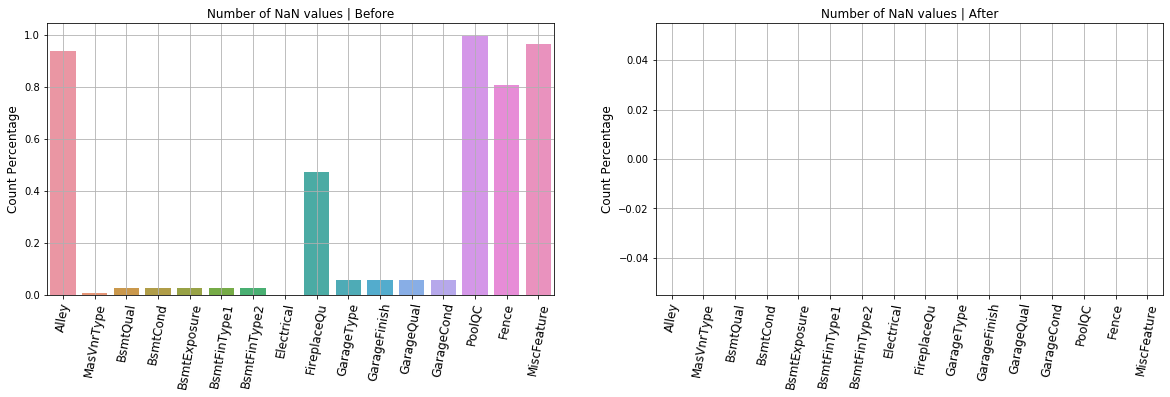

In [82]:
load_dataset()

# Categorical features having NaN values.
cat_nan_features = [f for f in dataset.columns if dataset[f].dtypes == 'O' and dataset[f].isnull().sum() > 0]

print('Total number of categorical features having NaN values :', len(cat_nan_features))

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.barplot(nan_features, (dataset[cat_nan_features].isnull().mean()))
plt.title('Number of NaN values | Before')
plt.xticks(rotation=80, fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)
plt.grid(1)

# REPLACING THE NAN VALUES WITH A NEW LABEL 'Missing'
dataset = replace_cat_features(dataset, cat_nan_features)


plt.subplot(1, 2, 2)
sns.barplot(cat_nan_features, (dataset[cat_nan_features].isnull().mean()))
plt.title('Number of NaN values | After')
plt.xticks(rotation=80, fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)
plt.grid(1)

## Dealing with Numerical Features containing NaN Values

**NOTE** : *Replace the NaN values with Median and not Mean if that particular feature contains a lot of outliers*

In [83]:
# Funtion to replace the NaN values of Numerical features

def replace_num_features(dataset, features):
    data = dataset.copy()
    
    for f in features:
        median_val = data[f].median() # Replacing with meadian because these features contains a lot of outliers.
        
        data[f+'_nan'] = np.where(data[f].isnull(), 1, 0)
        data[f].fillna(median_val, inplace=True)
        
    return data

Total number of Numerical features having NaN values : 3


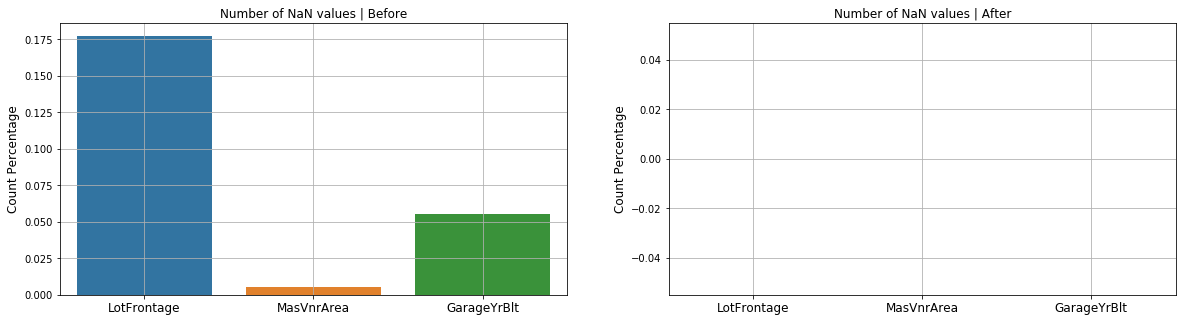

In [84]:
# load_dataset()

num_nan_features = [f for f in dataset.columns if dataset[f].dtype != 'O' and dataset[f].isnull().sum() > 0]

print('Total number of Numerical features having NaN values :', len(num_nan_features))

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.barplot(num_nan_features, (dataset[num_nan_features].isnull().mean()))
plt.title('Number of NaN values | Before')
plt.xticks(fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)
plt.grid(1)

# REPLACING THE NAN VALUES WITH A NEW LABEL 'Missing'
dataset = replace_num_features(dataset, num_nan_features)


plt.subplot(1, 2, 2)
sns.barplot(num_nan_features, (dataset[num_nan_features].isnull().mean()))
plt.title('Number of NaN values | After')
plt.xticks(fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)
plt.grid(1)